In [1]:

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
# %config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv


In [2]:
ser = serial.Serial('COM3', 9600, timeout=1)
dut.connect(ser)

dut.reset_chip()
dut.reset_dpe()
dut.ground_PIC()
dut.power_on()

DAC initialized to a span from 0 V to 5 V


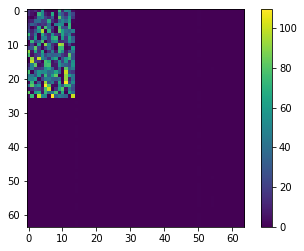

In [4]:
arr = 2
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap1 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            for gg in gains:
                    #rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=gg)
                    rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                    if rdCurr < maxCurr[gg]:
                        break
            Gmap1[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1)
plt.colorbar()

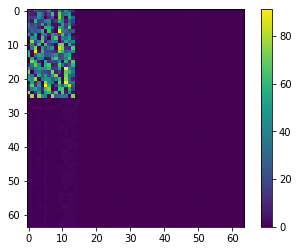

In [5]:
arr = 1
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap1 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            for gg in gains:
                    #rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=gg)
                    rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                    if rdCurr < maxCurr[gg]:
                        break
            Gmap1[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1)
plt.colorbar()

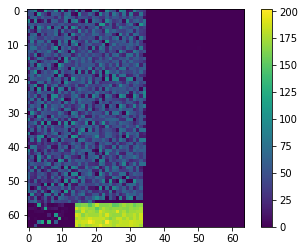

In [6]:
arr = 0
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
gains = np.array([4, 3, 2, 1, 0])
maxCurr = np.array([3.2e-3, 650e-6, 110e-6, 14.0e-6, 3.3e-6])
Gmap0 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            for gg in gains:
                    #rdCurr = a0.read_single_int(vRead, vReadGate, array=arr, row=rr, col=cc, gain=gg)
                    rdCurr = a0.pic_read_single(arr, rr, cc, Vread = vRead, skip_conf=False, gain=gg)
                    if rdCurr < maxCurr[gg]:
                        break
            Gmap0[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap0)
plt.colorbar()